In [279]:
import gensim
from gensim.models import Word2Vec, Phrases, LdaModel
from gensim.corpora import Dictionary
from gensim.utils import tokenize
import re
import string
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import json
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.preprocessing import MinMaxScaler
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")
# обычные импорты


In [280]:

try:
  with open('syntetic_large_en.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

  # Check if data is a list of dictionaries (suitable for DataFrame creation)
  if isinstance(data, list):
    # Create DataFrame from the list of dictionaries
    df = pd.DataFrame(data)
    print(df)
  else:
    print("Data is not a list of dictionaries. DataFrame creation not applicable.")

except FileNotFoundError as e:
  print(f"Error: File not found. {e}")
except json.JSONDecodeError as e:
  print(f"Error: Invalid JSON data. {e}")
#это я создал типо левые искусственные данные которые у меня были в json(chatgpt высрал)

        Religion                   Activities Favorite sport  \
0       Buddhism                  Photography       Swimming   
1        Atheism                  Photography         Tennis   
2        Atheism                  Photography        Running   
3       Buddhism  Playing musical instruments        Running   
4       Buddhism                    Traveling       Football   
..           ...                          ...            ...   
95  Christianity  Playing musical instruments        Running   
96  Christianity                  Photography       Swimming   
97         Islam  Playing musical instruments       Football   
98       Atheism  Playing musical instruments         Tennis   
99       Atheism                Reading books       Football   

            Dream job  Interests                         Goals  \
0        Entrepreneur    Science         Start my own business   
1        Entrepreneur      Music  Become an expert in my field   
2             Teacher    History 

In [281]:
df = pd.DataFrame(data)
df
# не обращай внимание на то что в конце стоит столбец текст считай еще один вопрос

Religion                   Activities Favorite sport  \
0       Buddhism                  Photography       Swimming   
1        Atheism                  Photography         Tennis   
2        Atheism                  Photography        Running   
3       Buddhism  Playing musical instruments        Running   
4       Buddhism                    Traveling       Football   
..           ...                          ...            ...   
95  Christianity  Playing musical instruments        Running   
96  Christianity                  Photography       Swimming   
97         Islam  Playing musical instruments       Football   
98       Atheism  Playing musical instruments         Tennis   
99       Atheism                Reading books       Football   

            Dream job  Interests                         Goals  \
0        Entrepreneur    Science         Start my own business   
1        Entrepreneur      Music  Become an expert in my field   
2             Teacher    History         Start my own business   
3        Entrepreneur    Science         Start my own business   
4              Artist  Traveling      Find the meaning of life   
..                ...        ...                           ...   
95  Software engineer        Art  Become an expert in my field   
96             Artist  Traveling      Find the meaning of life   
97       Entrepreneur      Music      Find the meaning of life   
98             Doctor    History      Find the meaning of life   
99            Teacher    Science      Find the meaning of life   

                                   Personality traits  \
0   language college along something sell action g...   
1   him hundred TV will everything degree hospital...   
2   movement however door today scientist eye radi...   
3            face indeed where peace rock avoid cover   
4   make still range accept almost American later ...   
..                                                ...   
95  bar season girl board democratic his ago certa...   
96  smile age figure policy decide positive inside...   
97              present fund star thing can stop bank   
98  by town him key analysis author own first than...   
99             off possible before man nice candidate   

                                     Dreams and goals  \
0   side drive need suddenly financial shake four ...   
1   answer resource general role quality leg and g...   
2   and follow knowledge letter alone claim eye wh...   
3   save real attorney strong artist store process...   
4   often door discussion quite choose once wall i...   
..                                                ...   
95  do role light somebody left environmental qual...   
96  go collection some bad administration mean cen...   
97  whose gas entire most picture town type develo...   
98  close popular minute decade include surface on...   
99  discussion reason example who challenge firm w...   

                                     Thoughts on life  \
0   civil foreign though international tend enviro...   
1   carry position car actually look effort establ...   
2   agreement trade story site education college t...   
3   audience then light glass across manage analys...   
4   store nor type rest finish per hold profession...   
..                                                ...   
95  ok political will require sort nor until wall ...   
96  example few including represent man fill site ...   
97  kitchen stay in high way two we network right ...   
98  generation ground impact mouth similar stock s...   
99  able walk woman thus myself record focus add e...   

                                         Expectations  
0   material employee say dinner future more estab...  
1   past parent upon economy technology today qual...  
2   heart speech simple better condition baby usua...  
3   involve analysis worry large effect day few de...  
4   big employee little section quite western qual...  
..                                                ...  

In [282]:
#искуссвтенно добавляю id шки
df.insert(0, 'id', range(1, len(df) + 1))
df.drop(columns=['Religion', 'Activities', 'Favorite sport', 'Dream job', 'Interests'], inplace=True)
df

id                         Goals  \
0     1         Start my own business   
1     2  Become an expert in my field   
2     3         Start my own business   
3     4         Start my own business   
4     5      Find the meaning of life   
..  ...                           ...   
95   96  Become an expert in my field   
96   97      Find the meaning of life   
97   98      Find the meaning of life   
98   99      Find the meaning of life   
99  100      Find the meaning of life   

                                   Personality traits  \
0   language college along something sell action g...   
1   him hundred TV will everything degree hospital...   
2   movement however door today scientist eye radi...   
3            face indeed where peace rock avoid cover   
4   make still range accept almost American later ...   
..                                                ...   
95  bar season girl board democratic his ago certa...   
96  smile age figure policy decide positive inside...   
97              present fund star thing can stop bank   
98  by town him key analysis author own first than...   
99             off possible before man nice candidate   

                                     Dreams and goals  \
0   side drive need suddenly financial shake four ...   
1   answer resource general role quality leg and g...   
2   and follow knowledge letter alone claim eye wh...   
3   save real attorney strong artist store process...   
4   often door discussion quite choose once wall i...   
..                                                ...   
95  do role light somebody left environmental qual...   
96  go collection some bad administration mean cen...   
97  whose gas entire most picture town type develo...   
98  close popular minute decade include surface on...   
99  discussion reason example who challenge firm w...   

                                     Thoughts on life  \
0   civil foreign though international tend enviro...   
1   carry position car actually look effort establ...   
2   agreement trade story site education college t...   
3   audience then light glass across manage analys...   
4   store nor type rest finish per hold profession...   
..                                                ...   
95  ok political will require sort nor until wall ...   
96  example few including represent man fill site ...   
97  kitchen stay in high way two we network right ...   
98  generation ground impact mouth similar stock s...   
99  able walk woman thus myself record focus add e...   

                                         Expectations  
0   material employee say dinner future more estab...  
1   past parent upon economy technology today qual...  
2   heart speech simple better condition baby usua...  
3   involve analysis worry large effect day few de...  
4   big employee little section quite western qual...  
..                                                ...  
95  almost attorney green peace station officer fl...  
96  scientist talk end husband building share anyt...  
97  marriage administration stop eye property dinn...  
98  thus audience interesting ahead page care indi...  
99  community side rate ok citizen rate population...  

[100 rows x 6 columns]

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yernar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [124]:
df.columns

Index(['id', 'Goals', 'Personality traits', 'Dreams and goals',
       'Thoughts on life', 'Expectations'],
      dtype='object')

In [288]:
def preprocess_df(df):
    # Исключение столбца 'id' перед предварительной обработкой текста
    df_text = df.drop(columns=['id'])

    # Преобразование текста в нижний регистр
    df_text = df_text.apply(lambda col: col.astype(str).str.lower())

    # Удаление неалфавитных символов и лишних пробелов
    df_text = df_text.apply(lambda col: col.str.replace(r'[^a-zA-Z\s]', '', regex=True))
    df_text = df_text.apply(lambda col: col.str.replace(r'\s+', ' ', regex=True))

    # Токенизация текста
    df_text = df_text.apply(lambda col: col.apply(nltk.word_tokenize))

    # Удаление стоп-слов
    stop_words = set(stopwords.words('english'))
    df_text = df_text.apply(lambda col: col.apply(lambda tokens: [token for token in tokens if token not in stop_words]))

    # Лемматизация текста
    lemmatizer = WordNetLemmatizer()
    df_text = df_text.apply(lambda col: col.apply(lambda tokens: [lemmatizer.lemmatize(token, pos="v") for token in tokens]))
    df_text = df_text.apply(lambda col: col.apply(' '.join))

    # Объединение обработанных данных с исходными данными и возврат DataFrame
    preprocessed_df = pd.concat([df[['id']], df_text], axis=1)
    return preprocessed_df

# Предварительная обработка DataFrame
preprocessed_df = preprocess_df(df)

# Отображение предварительно обработанного DataFrame
preprocessed_df


id                Goals  \
0     1       start business   
1     2  become expert field   
2     3       start business   
3     4       start business   
4     5       find mean life   
..  ...                  ...   
95   96  become expert field   
96   97       find mean life   
97   98       find mean life   
98   99       find mean life   
99  100       find mean life   

                                   Personality traits  \
0   language college along something sell action g...   
1   hundred tv everything degree hospital yard dev...   
2   movement however door today scientist eye radi...   
3                  face indeed peace rock avoid cover   
4   make still range accept almost american later ...   
..                                                ...   
95  bar season girl board democratic ago certain e...   
96  smile age figure policy decide positive inside...   
97                  present fund star thing stop bank   
98  town key analysis author first night exactly k...   
99                        possible man nice candidate   

                                     Dreams and goals  \
0   side drive need suddenly financial shake four ...   
1   answer resource general role quality leg gover...   
2   follow knowledge letter alone claim eye arm si...   
3   save real attorney strong artist store process...   
4   often door discussion quite choose wall imagin...   
..                                                ...   
95  role light somebody leave environmental qualit...   
96  go collection bad administration mean center p...   
97  whose gas entire picture town type development...   
98  close popular minute decade include surface on...   
99  discussion reason example challenge firm would...   

                                     Thoughts on life  \
0   civil foreign though international tend enviro...   
1   carry position car actually look effort establ...   
2   agreement trade story site education college t...   
3   audience light glass across manage analysis pr...   
4   store type rest finish per hold professional r...   
..                                                ...   
95  ok political require sort wall relate usually ...   
96  example include represent man fill site huge d...   
97  kitchen stay high way two network right street...   
98  generation grind impact mouth similar stock so...   
99  able walk woman thus record focus add eight fa...   

                                         Expectations  
0   material employee say dinner future establish ...  
1   past parent upon economy technology today qual...  
2   heart speech simple better condition baby usua...  
3      involve analysis worry large effect day decide  
4   big employee little section quite western qual...  
..                                                ...  
95  almost attorney green peace station officer fl...  
96  scientist talk end husband build share anythin...  
97  marriage administration stop eye property dinn...  
98  thus audience interest ahead page care individ...  
99  community side rate ok citizen rate population...  

[100 rows x 6 columns]

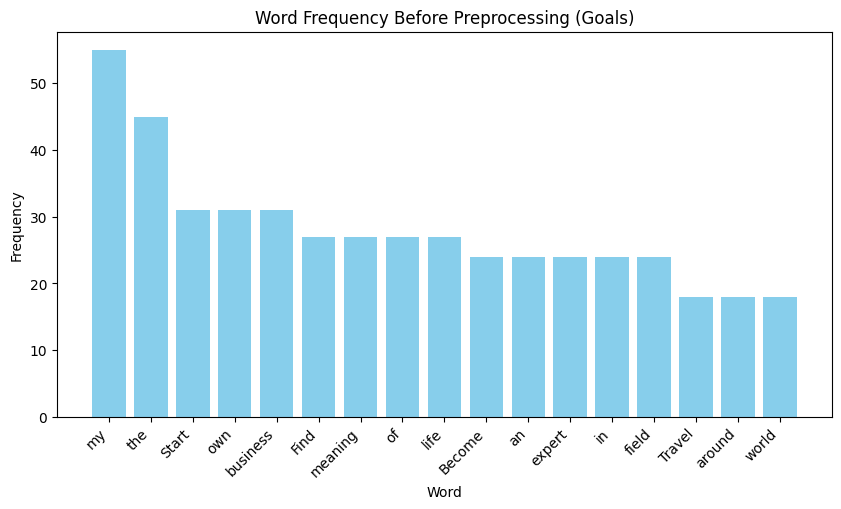

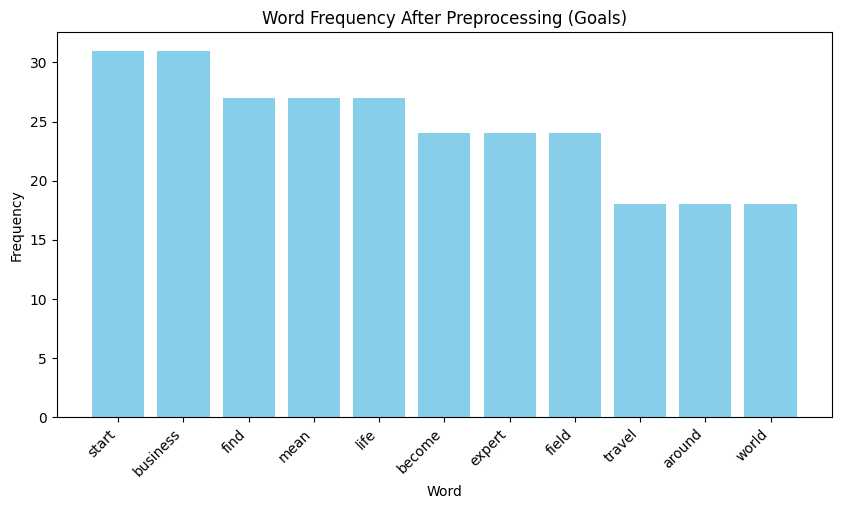

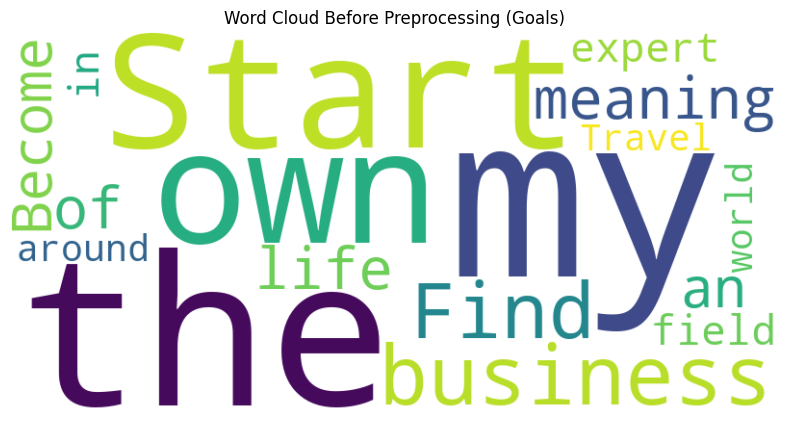

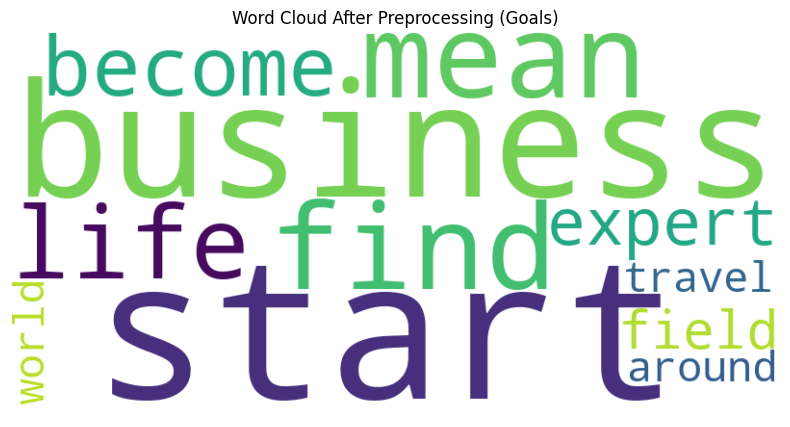

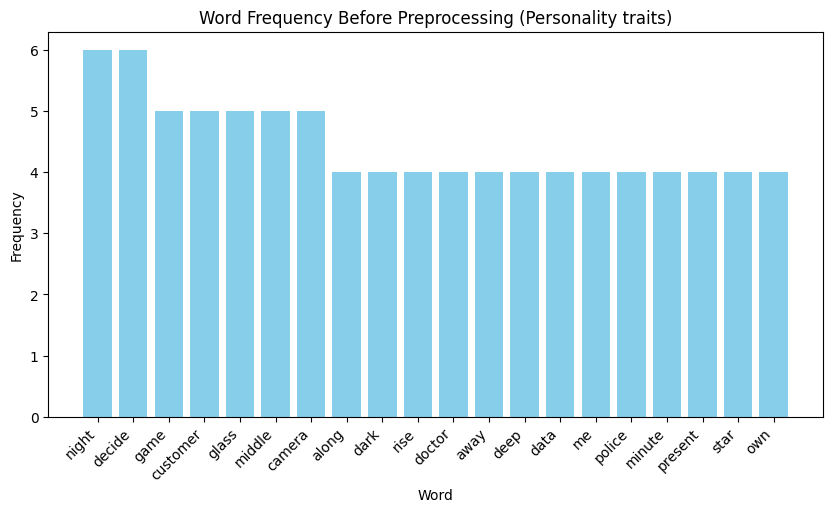

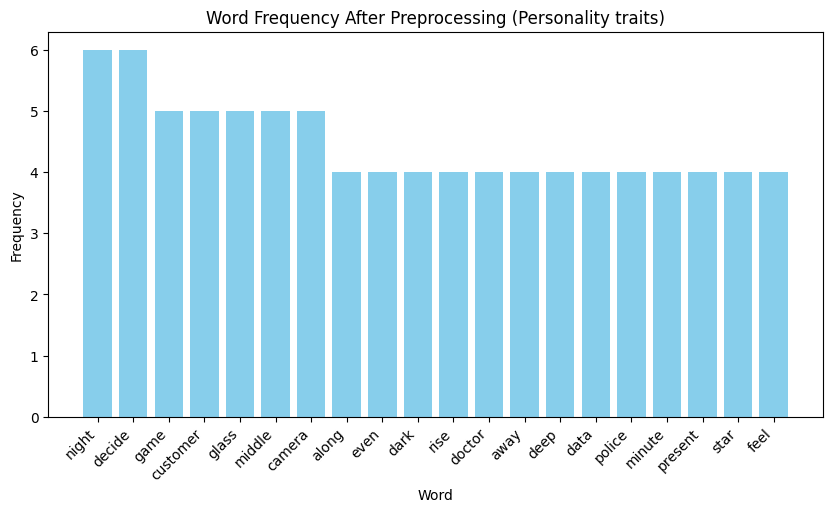

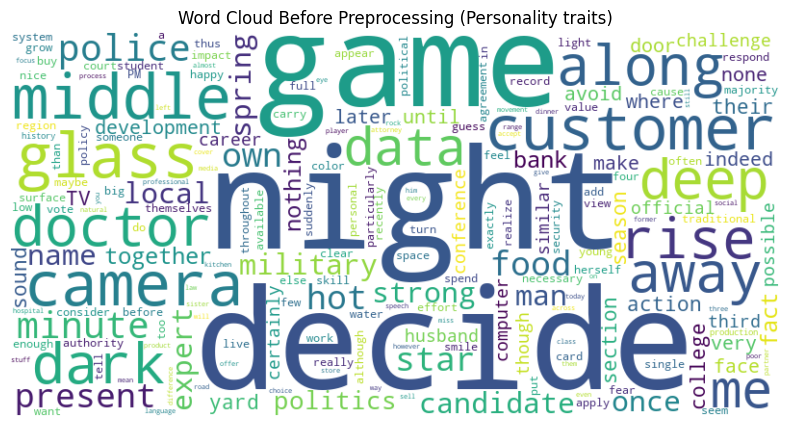

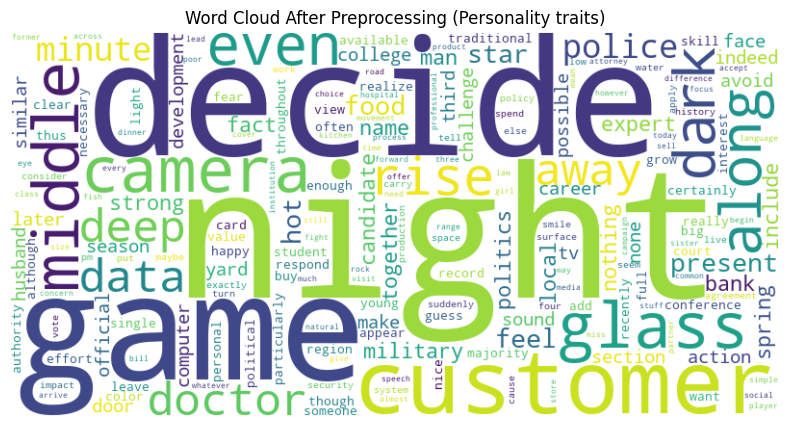

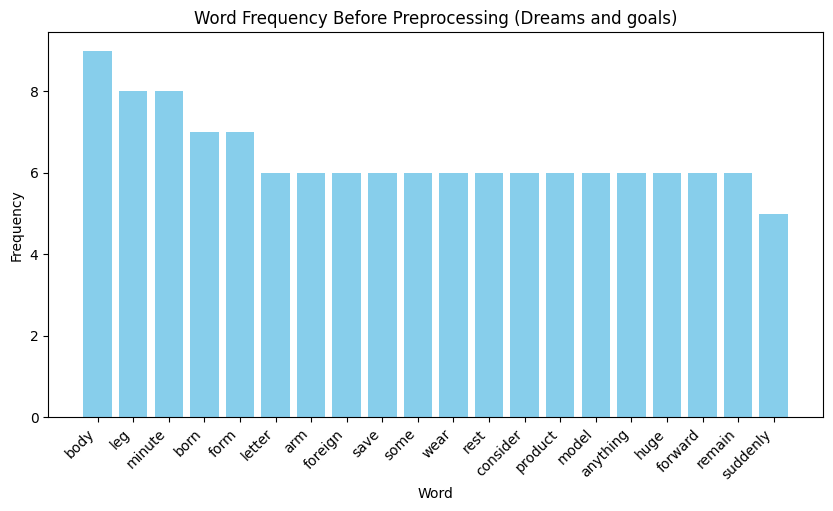

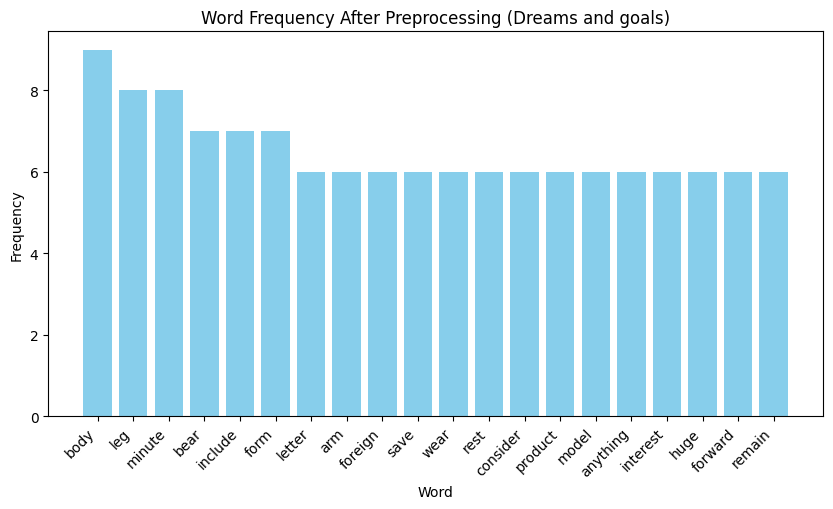

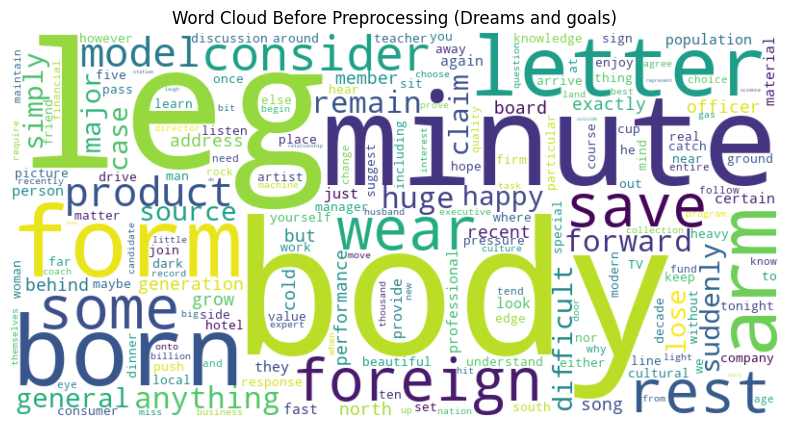

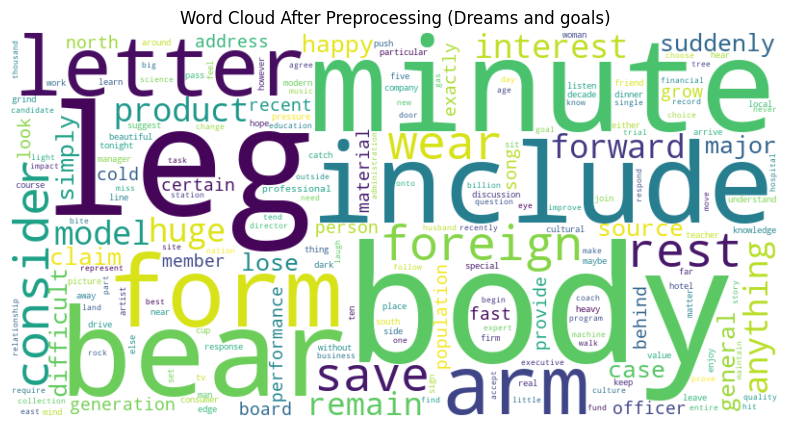

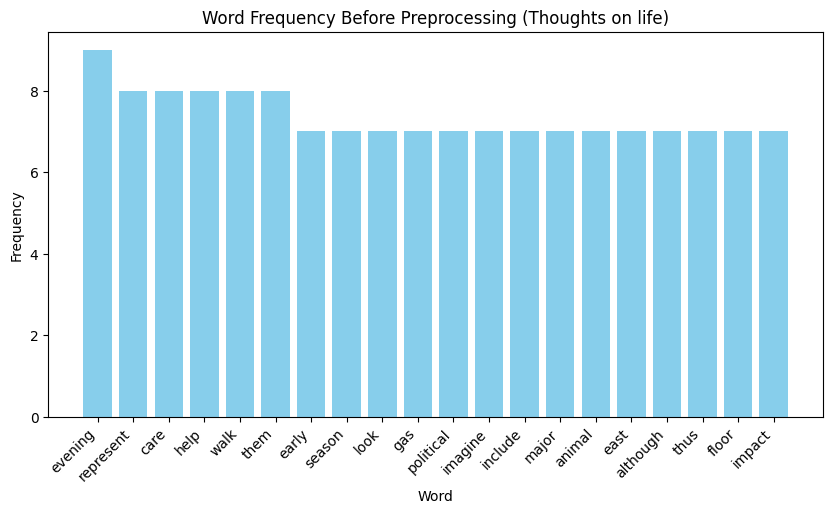

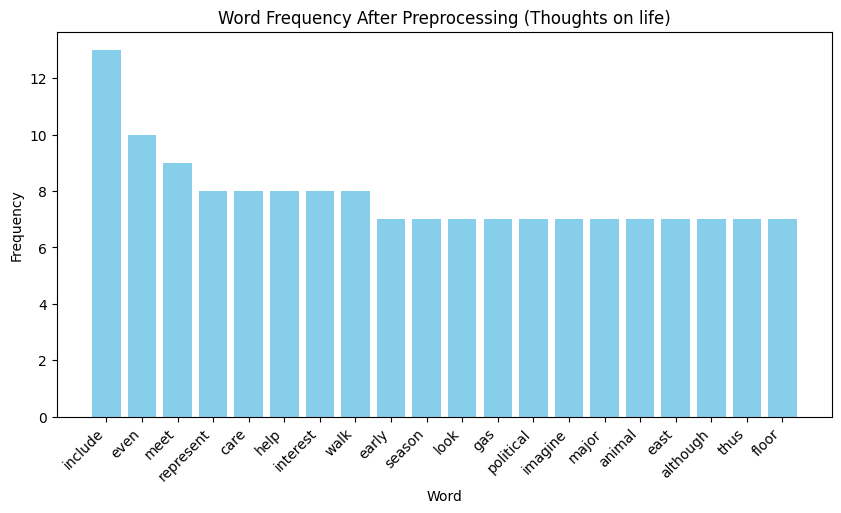

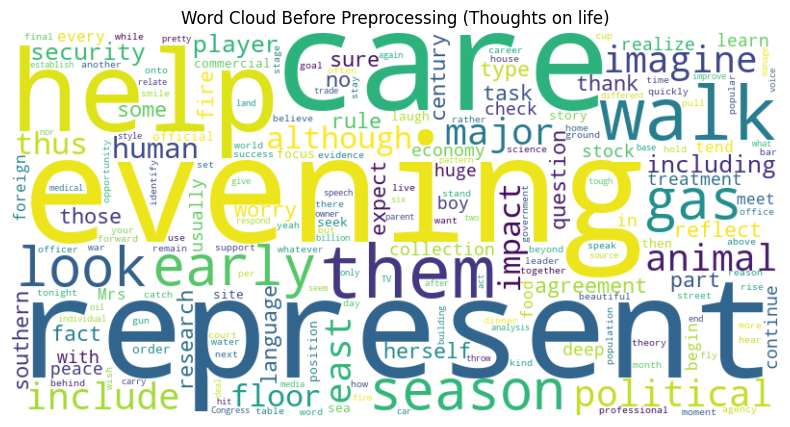

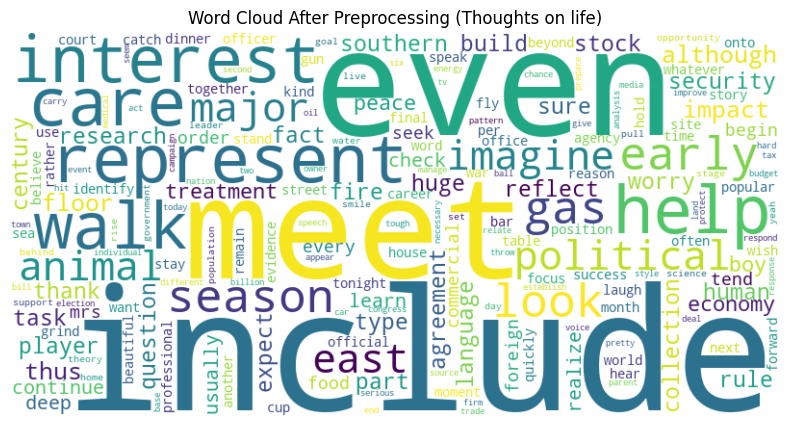

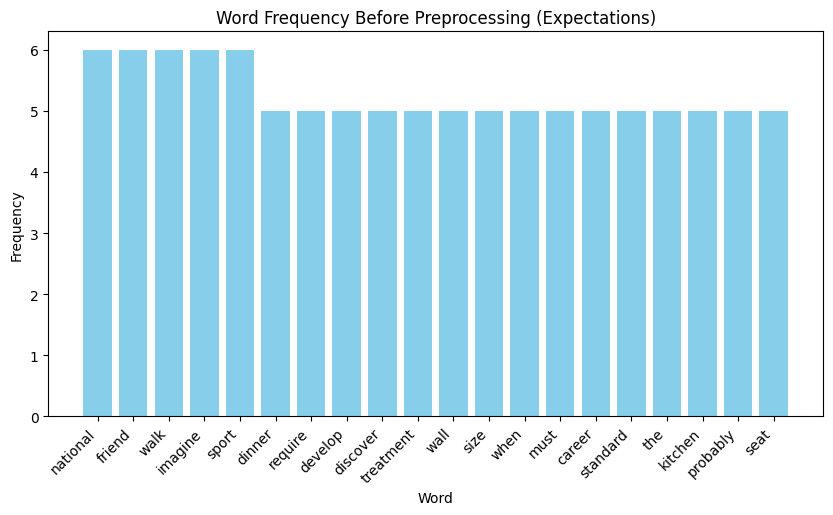

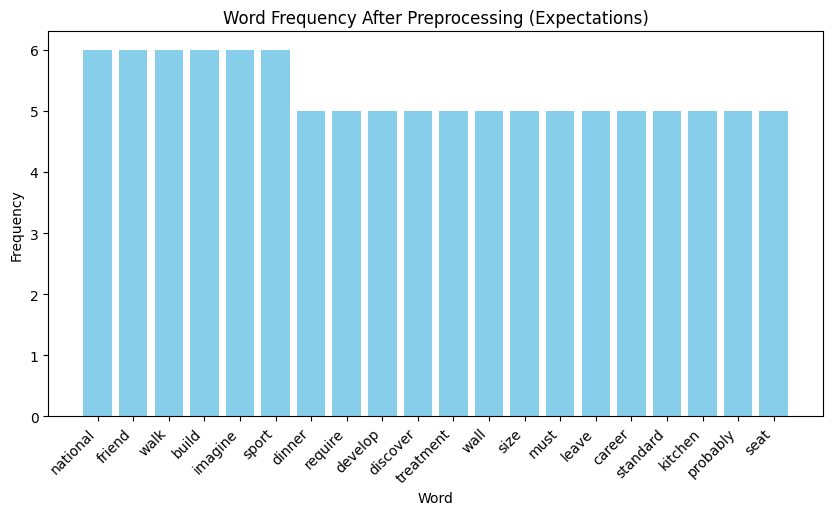

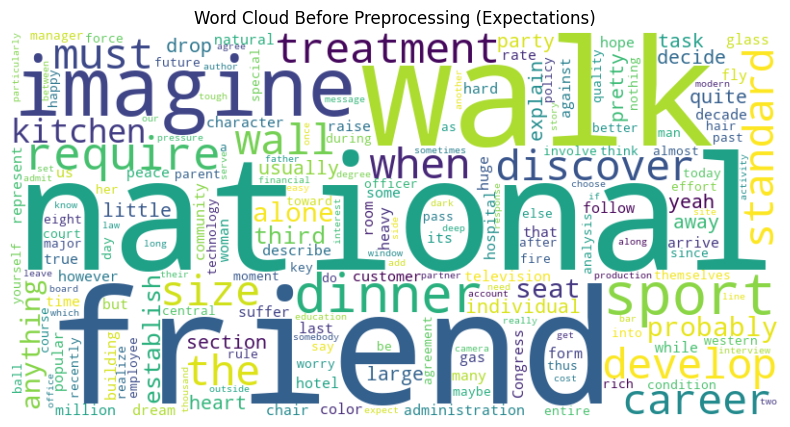

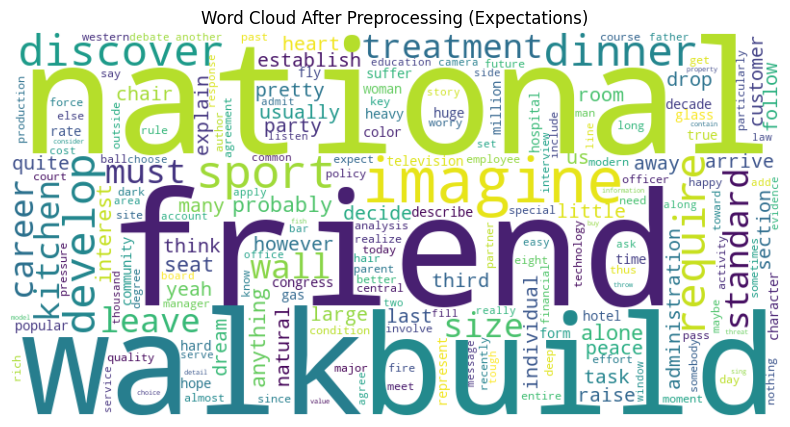

In [150]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Функция для получения статистики наиболее часто встречающихся слов
def get_word_frequency(df_column):
    all_words = ' '.join(df_column)
    word_freq = Counter(all_words.split())
    return word_freq

# Столбцы для анализа
columns_to_analyze = ['Goals', 'Personality traits', 'Dreams and goals', 'Thoughts on life', 'Expectations']

# Создание гистограмм и облаков тегов для каждого столбца
for column in columns_to_analyze:
    word_freq_before = get_word_frequency(df[column])
    word_freq_after = get_word_frequency(preprocessed_df[column])

    # Гистограмма наиболее часто встречающихся слов
    def plot_word_frequency(word_freq, title):
        word_freq_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])
        plt.figure(figsize=(10, 5))
        plt.bar(word_freq_df['Word'], word_freq_df['Frequency'], color='skyblue')
        plt.xlabel('Word')
        plt.ylabel('Frequency')
        plt.title(title)
        plt.xticks(rotation=45, ha='right')
        plt.show()

    plot_word_frequency(word_freq_before, f'Word Frequency Before Preprocessing ({column})')
    plot_word_frequency(word_freq_after, f'Word Frequency After Preprocessing ({column})')

    # Облако тегов наиболее часто встречающихся слов
    def generate_wordcloud(word_freq, title):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title)
        plt.show()

    generate_wordcloud(word_freq_before, f'Word Cloud Before Preprocessing ({column})')
    generate_wordcloud(word_freq_after, f'Word Cloud After Preprocessing ({column})')


In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

In [180]:
preprocessed_df.columns

Index(['id', 'Goals', 'Personality traits', 'Dreams and goals',
       'Thoughts on life', 'Expectations', 'weighted_features'],
      dtype='object')

In [129]:
import random
import pandas as pd
from datetime import datetime, timedelta

# Функция для генерации случайной даты и времени
def random_date(start, end):
    return start + timedelta(seconds=random.randint(0, int((end - start).total_seconds())))

# Генерация искусственных данных
def generate_data(num_rows):
    data = []
    author_ids = list(range(1, 101))  # 100 различных числовых идентификаторов для авторов
    target_ids = list(range(1, 101))  # 100 различных числовых идентификаторов для целей
    
    for _ in range(num_rows):
        author = random.choice(author_ids)
        target = random.choice(target_ids)
        num_messages = random.randint(1, 20)  # Случайное количество сообщений
        first_message_time = random_date(datetime(2024, 1, 1), datetime(2024, 4, 1))  # Случайное время первого сообщения
        last_message_time = first_message_time + timedelta(minutes=random.randint(1, 60*num_messages))  # Время последнего сообщения
        duration_minutes = int((last_message_time - first_message_time).total_seconds() / 60)  # Продолжительность общения в минутах
        
        data.append([author, target, num_messages, duration_minutes])
    
    return data

# Создание DataFrame
data = generate_data(150)
df_act = pd.DataFrame(data, columns=['Author_ID', 'Target_ID', 'Num_Messages', 'Duration_Minutes'])



# Вывод первых нескольких строк данных для проверки
df_act.describe()
 # тут я жай создал датасет где идет две айдишки которые сметчились, у них есть кол сообщ между собой и время общения

Author_ID   Target_ID  Num_Messages  Duration_Minutes
count  150.00000  150.000000    150.000000        150.000000
mean    49.12000   47.793333     10.093333        287.820000
std     29.50075   27.721602      5.691565        275.877735
min      1.00000    1.000000      1.000000          4.000000
25%     25.25000   24.250000      5.000000         64.250000
50%     46.00000   48.000000     10.000000        185.000000
75%     75.00000   69.000000     14.750000        441.250000
max    100.00000   99.000000     20.000000       1197.000000

In [170]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MaxAbsScaler

def cluster_users_with_cosine_and_dbscan(data_df, parameter_columns, eps=0.5, min_samples=5):
    # Step 1: Combine weighted features and vectorize using TF-IDF
    parameter_weights = [1.0] * len(parameter_columns)

    def combine_weighted_features(row, weights):
        combined_features = []
        for i, value in enumerate(row[parameter_columns]):
            value = str(value)
            weighted_feature = value + ' ' * int(weights[i] * len(value))
            combined_features.append(weighted_feature)
        return ' '.join(combined_features)

    data_df['weighted_features'] = data_df.apply(combine_weighted_features, axis=1, args=[parameter_weights])
    vectorizer = TfidfVectorizer()
    combined_feature_vectors = vectorizer.fit_transform(data_df['weighted_features'])
    
    # Step 2: Compute cosine similarity matrix
    cosine_sim_matrix = cosine_similarity(combined_feature_vectors)
    
    # Step 3: Scale cosine similarity matrix using MaxAbsScaler
    scaler = MaxAbsScaler()
    scaled_cosine_sim_matrix = scaler.fit_transform(cosine_sim_matrix)
    
    # Step 4: Apply DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(scaled_cosine_sim_matrix)
    
    # Collect similar users based on DBSCAN clusters
    similar_users = {}
    for i, user_id in enumerate(data_df['id']):
        cluster_label = cluster_labels[i]
        if cluster_label not in similar_users:
            similar_users[cluster_label] = []
        similar_users[cluster_label].append(user_id)
    
    return similar_users, cosine_sim_matrix, cluster_labels

# Пример использования:
# Assuming preprocessed_df is your DataFrame containing the data and 'id' column
# Your DataFrame initialization with data

# Define parameter columns (features) to use for clustering
parameter_columns = list(preprocessed_df.columns[1:])  # Exclude the first column (assuming it's the 'id')

# Cluster users using cosine similarity and DBSCAN
similar_users, cosine_sim_matrix, cluster_labels = cluster_users_with_cosine_and_dbscan(preprocessed_df, parameter_columns, eps=0.5, min_samples=5)
print("Cosine Similarity Matrix:")
print(cosine_sim_matrix)


print("Cluster Labels:")
print(cluster_labels)
# Вывод результата
#for cluster_label, users in similar_users.items():
  #  print(f"Кластер {cluster_label}: {users}")
# пропусти этот код смотри ниже тут я начинаю лдей на кластеры делить по simmiliarity тут это делается с помощью DBSCAN(алгоритм кластеризациий)

Cosine Similarity Matrix:
[[1.         0.06890196 0.09833265 ... 0.05367937 0.0079472  0.02152098]
 [0.06890196 1.         0.08837417 ... 0.02985919 0.05380506 0.06167087]
 [0.09833265 0.08837417 1.         ... 0.10793991 0.02916018 0.04564536]
 ...
 [0.05367937 0.02985919 0.10793991 ... 1.         0.10025454 0.05249983]
 [0.0079472  0.05380506 0.02916018 ... 0.10025454 1.         0.13578015]
 [0.02152098 0.06167087 0.04564536 ... 0.05249983 0.13578015 1.        ]]
Cluster Labels:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


In [132]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import MaxAbsScaler

def cluster_users_with_cosine_and_kmeans(data_df, parameter_columns, num_clusters=2):
    # Step 1: Combine weighted features and vectorize using TF-IDF
    parameter_weights = [1.0] * len(parameter_columns)

   
    
    def combine_weighted_features(row, weights):
        combined_features = []
        for i, value in enumerate(row[parameter_columns]):
            value = str(value)
            weighted_feature = value + ' ' * int(weights[i] * len(value))
            combined_features.append(weighted_feature)
        return ' '.join(combined_features)

    data_df['weighted_features'] = data_df.apply(combine_weighted_features, axis=1, args=[parameter_weights])
    vectorizer = TfidfVectorizer()
    combined_feature_vectors = vectorizer.fit_transform(data_df['weighted_features'])
    
    # Step 2: Compute cosine similarity matrix
    cosine_sim_matrix = cosine_similarity(combined_feature_vectors)
    
    # Step 3: Scale cosine similarity matrix using MaxAbsScaler
    scaler = MaxAbsScaler()
    scaled_cosine_sim_matrix = scaler.fit_transform(cosine_sim_matrix)
    
    # Step 4: Apply K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_cosine_sim_matrix)
    
    # Collect similar users based on K-means clusters
    similar_users = {}
    for i, user_id in enumerate(data_df['id']):
        similar_users[user_id] = list(data_df.loc[cluster_labels == cluster_labels[i], 'id'])
    
    return similar_users, cosine_sim_matrix, cluster_labels

# Example usage:
# Assuming preprocessed_df is your DataFrame containing the data and 'id' column
  # Your DataFrame initialization with data

# Define parameter columns (features) to use for clustering
parameter_columns = list(preprocessed_df.columns[1:])  # Exclude the first column (assuming it's the 'id')

# Cluster users using cosine similarity and K-means
similar_users, cosine_sim_matrix, cluster_labels = cluster_users_with_cosine_and_kmeans(preprocessed_df, parameter_columns, num_clusters=3)

# Display results
#for user_id, similar_ids in similar_users.items():
 #   print(f"User: {user_id}, Similar Users: {similar_ids}")

# Optionally, print or visualize the cosine similarity matrix and cluster labels
print("Cosine Similarity Matrix:")
print(cosine_sim_matrix)

print("Cluster Labels:")
print(cluster_labels)
#ТУТ Я ДЕЛИЛ НА КЛАСТЕРЫ С ПОМОЩЬЮ KMEANS и тут как ты видишь результат similoarty людей просто пример на самом деле как это выглядит 
#ниже уже вещь которая влияет на дальнейший результат

Cosine Similarity Matrix:
[[1.         0.06890196 0.09833265 ... 0.05367937 0.0079472  0.02152098]
 [0.06890196 1.         0.08837417 ... 0.02985919 0.05380506 0.06167087]
 [0.09833265 0.08837417 1.         ... 0.10793991 0.02916018 0.04564536]
 ...
 [0.05367937 0.02985919 0.10793991 ... 1.         0.10025454 0.05249983]
 [0.0079472  0.05380506 0.02916018 ... 0.10025454 1.         0.13578015]
 [0.02152098 0.06167087 0.04564536 ... 0.05249983 0.13578015 1.        ]]
Cluster Labels:
[2 1 1 1 0 2 2 1 1 2 2 1 2 0 1 2 0 2 0 0 2 2 1 2 1 0 2 1 1 2 2 1 1 2 2 2 1
 0 1 2 2 2 0 2 0 1 2 1 1 0 0 2 2 1 2 1 1 2 1 1 0 1 2 2 1 2 0 1 2 1 0 0 1 2
 2 0 0 2 2 2 2 1 1 2 2 2 1 2 2 0 1 0 1 2 1 1 2 1 2 1]


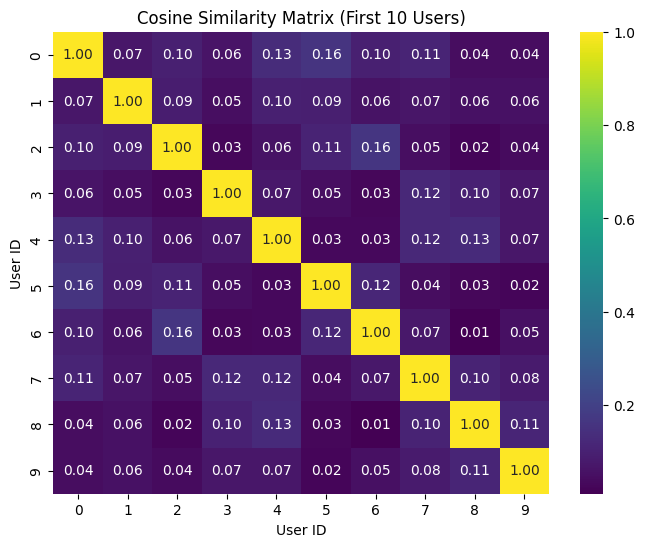

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Функция для визуализации подматрицы косинусного расстояния (для первых 10 пользователей)
def visualize_cosine_similarity_subset(cosine_sim_matrix):
    subset_size = 10
    subset = cosine_sim_matrix[:subset_size, :subset_size]
    plt.figure(figsize=(8, 6))
    sns.heatmap(subset, cmap='viridis', annot=True, fmt=".2f")
    plt.title("Cosine Similarity Matrix (First 10 Users)")
    plt.xlabel("User ID")
    plt.ylabel("User ID")
    plt.show()

# Вызов функции для визуализации подматрицы косинусного расстояния
visualize_cosine_similarity_subset(cosine_sim_matrix)


In [153]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import MaxAbsScaler

def cluster_users_with_cosine_and_kmeans(data_df, parameter_columns, num_clusters=2):
    # Step 1: Combine weighted features and vectorize using TF-IDF
    parameter_weights = [1.0] * len(parameter_columns)

    def combine_weighted_features(row, weights):
        combined_features = []
        for i, value in enumerate(row[parameter_columns]):
            value = str(value)
            weighted_feature = value + ' ' * int(weights[i] * len(value))
            combined_features.append(weighted_feature)
        return ' '.join(combined_features)

    data_df['weighted_features'] = data_df.apply(combine_weighted_features, axis=1, args=[parameter_weights])
    vectorizer = TfidfVectorizer()
    combined_feature_vectors = vectorizer.fit_transform(data_df['weighted_features'])
    
    # Step 2: Compute cosine similarity matrix
    cosine_sim_matrix = cosine_similarity(combined_feature_vectors)
    
    # Step 3: Scale cosine similarity matrix using MaxAbsScaler
    scaler = MaxAbsScaler()
    scaled_cosine_sim_matrix = scaler.fit_transform(cosine_sim_matrix)
    
    # Step 4: Apply K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_cosine_sim_matrix)
    
    # Collect similar users based on K-means clusters
    similar_users = []
    num_users = len(data_df)
    for i in range(num_users):
        for j in range(i+1, num_users):
            similarity = cosine_sim_matrix[i, j]
            user1_id, user2_id = data_df.loc[i, 'id'], data_df.loc[j, 'id']
            if (user1_id, user2_id) not in similar_users and (user2_id, user1_id) not in similar_users:
                similar_users.append((user1_id, user2_id, similarity))
    
    return similar_users, cosine_sim_matrix, cluster_labels

# Пример использования:
# Assuming preprocessed_df is your DataFrame containing the data and 'id' column
# Your DataFrame initialization with data

# Define parameter columns (features) to use for clustering
parameter_columns = list(preprocessed_df.columns[1:])  # Exclude the first column (assuming it's the 'id')

# Cluster users using cosine similarity and K-means
similar_users, cosine_sim_matrix, cluster_labels = cluster_users_with_cosine_and_kmeans(preprocessed_df, parameter_columns, num_clusters=3)
df_sim = pd.DataFrame(similar_users, columns=['id', 'id2', 'sim'])
# Вывод результата
#for user1_id, user2_id, similarity in similar_users:
 # print(f"Пользователь {user1_id} и пользователь {user2_id} имеют сходство {similarity}")
df_sim
# как ты понял тут я типо вытащить similiarty в dataframe

id  id2       sim
0      1    2  0.068902
1      1    3  0.098333
2      1    4  0.062855
3      1    5  0.130792
4      1    6  0.159761
...   ..  ...       ...
4945  97   99  0.048613
4946  97  100  0.094877
4947  98   99  0.100255
4948  98  100  0.052500
4949  99  100  0.135780

[4950 rows x 3 columns]

In [108]:
cosine_sim_matrix.shape

(100, 100)

In [111]:
import json
import random
from faker import Faker

# Инициализация Faker для генерации реалистичных данных
fake = Faker()

# Список возможных значений для каждого параметра
religions = ["Christianity", "Islam", "Buddhism", "Judaism", "Atheism"]
activities = ["Reading books", "Playing musical instruments", "Photography", "Sports competitions", "Traveling"]
sports = ["Football", "Basketball", "Tennis", "Running", "Swimming"]
dream_jobs = ["Doctor", "Software engineer", "Teacher", "Artist", "Entrepreneur"]
interests = ["History", "Science", "Art", "Music", "Traveling"]
goals = ["Start my own business", "Travel around the world", "Find the meaning of life", "Become an expert in my field"]

# Создание списка с 100 примерами данных
people_data = []

for i in range(100):
    religion = random.choice(religions)
    activity = random.choice(activities)
    sport = random.choice(sports)
    dream_job = random.choice(dream_jobs)
    interest = random.choice(interests)
    goal = random.choice(goals)

    # Генерация уникальных слов для каждого параметра
    personality_traits = " ".join(fake.words(nb=random.randint(5, 20)))  # Описание характера
    dreams_and_goals = " ".join(fake.words(nb=random.randint(10, 30)))  # Цели и мечты
    thoughts_on_life = " ".join(fake.words(nb=random.randint(15, 40)))  # Рассуждения о жизни и обществе
    expectations = " ".join(fake.words(nb=random.randint(8, 25)))  # Ожидания от будущего

    # Добавление данных в список
    person_data = {
        "Religion": religion,
        "Activities": activity,
        "Favorite sport": sport,
        "Dream job": dream_job,
        "Interests": interest,
        "Goals": goal,
        "Personality traits": personality_traits,
        "Dreams and goals": dreams_and_goals,
        "Thoughts on life": thoughts_on_life,
        "Expectations": expectations
    }

    people_data.append(person_data)

# Сохранение данных в JSON файл
with open("syntetic_large_en.json", "w", encoding="utf-8") as json_file:
    json.dump(people_data, json_file, ensure_ascii=False, indent=4)

print("Данные успешно сгенерированы и сохранены в файл 'syntetic_large_en.json'.")


Данные успешно сгенерированы и сохранены в файл 'syntetic_large_en.json'.


In [154]:
invalid_ids = preprocessed_df[~preprocessed_df['id'].astype(str).str.isdigit()]
print(invalid_ids.shape)


(0, 7)


In [266]:

df_act['Target_ID'] = df_act['Target_ID'].astype(int)
preprocessed_df['id'] = preprocessed_df['id'].astype(int)
df_act['Author_ID'] = df_act['Author_ID'].astype(int)
df_sim['id'] = df_sim['id'].astype(int)
df_sim['id2'] = df_sim['id2'].astype(int)
df_act['Ratio_Duration_Messages'] = 1/(df_act['Duration_Minutes'] / df_act['Num_Messages']) #простая метрика которая не показывает


merged_df = pd.merge(df_act, df_sim, left_on=['Author_ID', 'Target_ID'], right_on=['id', 'id2'], how='inner')

final_df = pd.merge(preprocessed_df, merged_df, left_on='id', right_on='Author_ID', how='inner')
final_df = pd.merge(final_df, preprocessed_df, left_on='Target_ID', right_on='id', how='inner')

author_ids = final_df['Author_ID']
target_ids = final_df['Target_ID']

final_df.drop(columns=['Author_ID', 'Target_ID', 'id_y', 'id2'], inplace=True)
final_df.rename(columns={'id_x': 'Author_ID'}, inplace=True)
final_df.drop(columns=['Author_ID', 'id'], inplace=True)

vectorizers = {}
X_text_features = []
from sklearn.feature_extraction.text import TfidfVectorizer


# Векторизация текстовых столбцов
text_columns = ['Goals_x', 'Personality traits_x', 'Dreams and goals_x',
       'Thoughts on life_x', 'Expectations_x', 'weighted_features_x','Goals_y', 'Personality traits_y', 'Dreams and goals_y',
       'Thoughts on life_y', 'Expectations_y', 'weighted_features_y']

for col in text_columns:
    vectorizer = TfidfVectorizer()
    X_text_feature = vectorizer.fit_transform(final_df[col])
    vectorizers[col] = vectorizer
    X_text_features.append(X_text_feature.toarray())

# Объединение всех текстовых признаков
X_text_features = np.concatenate(X_text_features, axis=1)

# Числовые признаки
X_numerical =final_df.drop(columns=[ 'Goals_x', 'Personality traits_x', 'Dreams and goals_x',
       'Thoughts on life_x', 'Expectations_x', 'weighted_features_x','Goals_y', 'Personality traits_y', 'Dreams and goals_y',
       'Thoughts on life_y', 'Expectations_y', 'weighted_features_y']).values

# Объединение текстовых и числовых признаков
X = np.concatenate((X_text_features, X_numerical), axis=1)
y = final_df['Ratio_Duration_Messages'].values
scaler1 = MinMaxScaler()
y = scaler1.fit_transform(y.reshape(-1, 1)).flatten()




In [213]:
final_df.columns


Index(['Goals_x', 'Personality traits_x', 'Dreams and goals_x',
       'Thoughts on life_x', 'Expectations_x', 'weighted_features_x',
       'Num_Messages', 'Duration_Minutes', 'Ratio_Duration_Messages', 'sim',
       'Goals_y', 'Personality traits_y', 'Dreams and goals_y',
       'Thoughts on life_y', 'Expectations_y', 'weighted_features_y'],
      dtype='object')

In [261]:
import numpy as np

# Проверяем тип данных в массиве X
data_type = X.dtype

# Печатаем тип данных массива X
print(data_type)

# Проверяем, содержатся ли только типы int или float
if data_type == np.int64 or data_type == np.float64:
    print("Все данные в X либо int, либо float.")
else:
    print("В X есть данные, отличные от int и float.")

float64
Все данные в X либо int, либо float.


In [216]:
non_numeric_values = [x for x in X if not isinstance(x, (int, float))]

# Выведем полученные значения
#print(non_numeric_values)

In [268]:
from sklearn.model_selection import train_test_split

# Разделение данных на тренировочный и тестовый наборы
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test, author_ids_train, author_ids_test, target_ids_train, target_ids_test = train_test_split(
    X, y, author_ids, target_ids, test_size=0.2, random_state=42)

In [221]:
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))  # Добавляем Dropout слой
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Добавляем Dropout слой
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

from keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])




history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.0000e+00 - loss: 1.3293 - val_accuracy: 0.0000e+00 - val_loss: 0.2267
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0256 - loss: 0.3305 - val_accuracy: 0.0000e+00 - val_loss: 0.2267
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0152 - loss: 0.3934 - val_accuracy: 0.0000e+00 - val_loss: 0.2246
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0256 - loss: 0.3095 - val_accuracy: 0.0000e+00 - val_loss: 0.2245
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.0152 - loss: 0.4091 - val_accuracy: 0.0000e+00 - val_loss: 0.2254
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0256 - loss: 0.2734 - val_accuracy: 0.0000e+00 - val_loss: 0.2240
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0256 - loss: 0.2926 - val_accuracy: 0.0000e+00 - val_loss: 0.2232
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0152 - loss: 0.3875 -

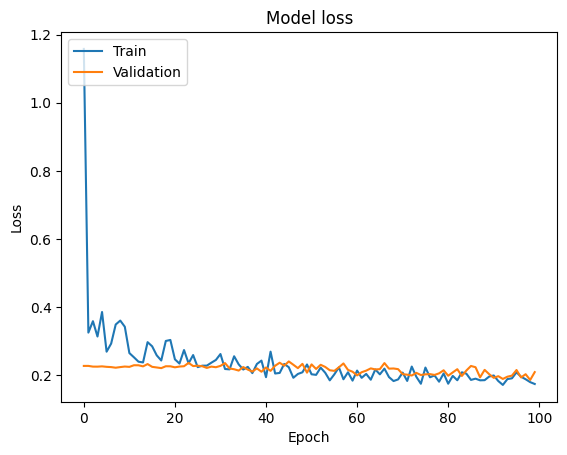

In [222]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [223]:
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import mean_squared_error, r2_score

# Example for regression
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Mean Squared Error: 0.08116846368634532
R^2 Score: 0.2531343915014971


In [269]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

# Создание модели
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели с оптимизатором Adam и измененной скоростью обучения
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.0152 - loss: 4.3349 - val_accuracy: 0.0000e+00 - val_loss: 3.9738
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0000e+00 - loss: 4.4360 - val_accuracy: 0.0000e+00 - val_loss: 3.9275
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.0256 - loss: 3.9720 - val_accuracy: 0.0000e+00 - val_loss: 3.8819
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0256 - loss: 4.0309 - val_accuracy: 0.0000e+00 - val_loss: 3.8373
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0000e+00 - loss: 4.1985 - val_accuracy: 0.0000e+00 - val_loss: 3.7936
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0256 - loss: 3.9422 - val_accuracy: 0.0000e+00 - val_loss: 3.7508
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0000e+00 - loss: 3.8784 - val_accuracy: 0.0000e+00 - val_loss: 3.7087
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0256 - loss: 

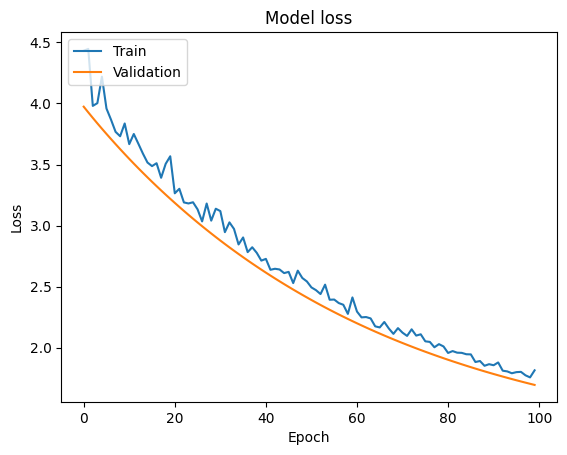

In [270]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [271]:
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import mean_squared_error, r2_score

# Example for regression
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Mean Squared Error: 0.052865786406127116
R^2 Score: 0.5135593808262974


In [273]:
results_df = pd.DataFrame({
    'Author_ID': author_ids_test,
    'Target_ID': target_ids_test,
    'Prediction': predictions.flatten()
})

# Теперь results_df содержит прогнозы вместе с соответствующими Author_ID и Target_ID
print(results_df.head())

    Author_ID  Target_ID  Prediction
22         15         30    0.000656
0           1         13    0.305063
49         40         95    0.017650
4           4         32    0.454822
54         46         81    0.034834


In [258]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras import regularizers

# Создание модели
model = Sequential()
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))  
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))  
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели с оптимизатором Adam и измененным learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели с увеличенным количеством эпох
history = model.fit(X_train, y_train, epochs=250, batch_size=64, validation_split=0.2, verbose=0)


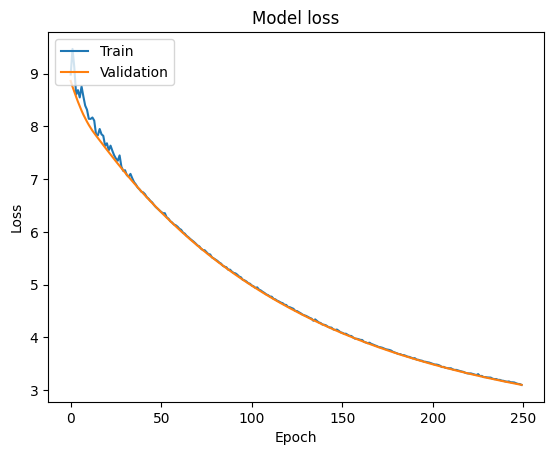

In [259]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [260]:
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import mean_squared_error, r2_score

# Example for regression
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Mean Squared Error: 0.06154414624537983
R^2 Score: 0.43370609535376703
